In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
data = np.loadtxt('smoking.txt')
age = data[:,0]
FEV1 = data[:,1]
height = data[:,2]
gender = data[:,3]
smoking_status = data[:,4]
weight = data[:,5]
from __future__ import division

1)initiate iteration weight at 0 or normal distribtuion of (mean=0, var = 1) <br>
2)for t = 0 to max <br>
3) within loop calculate gradient: -1/N sum of y_n*x_n/ (1+ exp(y_n*w.transpose*x_n)) <br>
gradient has dimensions of a vector<br>
4) v_t = -gradient

multiply x_n vector with the weight vector

In [352]:
# input: 1) x: the independent variable, as a N dimensional vector as a numpy array
#        2) y: the dependent variable, as a N dimensional vector as a numpy array
#
# output: 1) the alpha parameter
#         2) the beta parameter
def univarlinreg(x,y):
    #following part is from textbook:
    #defining functions for calculations
    def dot(v, w):
            """v_1 * w_1 + ... + v_n * w_n"""
            return sum(v_i * w_i for v_i, w_i in zip(v, w))
    def sum_of_squares(v):
        """v_1 * v_1 + ... + v_n * v_n"""
        return dot(v, v)
    def mean(x):
        return sum(x) / len(x)
    def de_mean(x):
        """translate x by subtracting its mean (so the result has mean 0)"""
        x_bar = mean(x)
        return [x_i - x_bar for x_i in x]
    def variance(x):
        """assumes x has at least two elements"""
        n = len(x)
        deviations = de_mean(x)
        return sum_of_squares(deviations) / (n - 1)
    def std_dv(x):
        return math.sqrt(variance(x))
    def covariance(x,y):
        n = len(x)
        return dot(de_mean(x), de_mean(y))/(n-1)
        
    def corr(x,y):
        stdev_x = std_dv(x)
        stdev_y = std_dv(y)
        if stdev_x > 0 and stdev_y > 0:
            return covariance(x,y)/stdev_x / stdev_y
        else:
            return 0
    
    #univariate linear regression part
    beta = corr(x, y) * std_dv(y)/ std_dv(x)
    alpha = mean(y) - beta*mean(x)
    
    return alpha, beta
    pass



0.431648105733
0.222040975958


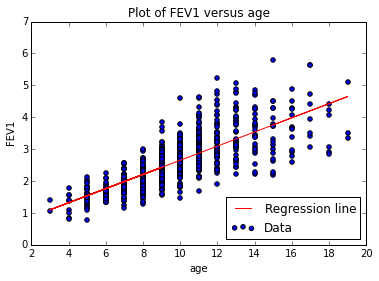

In [267]:
#b) Apply your implementation to the entire dataset,
#and record your alpha and beta values.
alpha, beta = univarlinreg(age,FEV1)
print alpha
print beta
#Plot your data points together with your estimated regression line.
plt.scatter(age, FEV1, label = "Data")
FEV1_reg = alpha + beta*age 
plt.plot(age, FEV1_reg, 'r', label="Regression line")
#Remember to label your axes and your plot.
plt.xlabel('age')
plt.ylabel('FEV1')
plt.title('Plot of FEV1 versus age')
plt.legend(loc='lower right')
#Describe what you see and discuss briefly how the variable age relates to FEV1 according to your model.

In [353]:
# input: 1) x: the independent variable, as a N dimensional vector as a numpy array
#        2) y: the dependent variable, as a N dimensional vector as a numpy array
#        3) alpha: the alpha parameter
#        4) beta: the beta parameter
#
# output: 1) the root mean square error (rmse) 

def rmse(x, y, alpha, beta):
    total_se = np.sum((y_i - (alpha + np.dot(beta,x_i)) )** 2 for x_i, y_i in zip(x, y))
    rmse = np.sqrt( total_se / len(x) )
    return rmse
    pass


In [409]:
#d) Select 450 random subjects as a test set
#and use only these subjects to build the regres- sion model.
#Use the remaining 204 subjects to compute RMSE(alpha,beta) of your model.

#separate out subjects for testing and for computing RMSE
rand = np.random.permutation(len(age))
test_indices = rand[:450]
remain_indices = np.setdiff1d(rand, test_indices)

FEV1_test = FEV1[test_indices]
age_test = age[test_indices]
alpha_test, beta_test = univarlinreg(age_test, FEV1_test)

FEV1_remain = FEV1[remain_indices]
age_remain = age[remain_indices]
print rmse(age_remain,FEV1_remain,alpha_test,beta_test)

0.572462844345


In [379]:
# input: 1) x: the independent variables (data matrix), as a N x M dimensional matrix as a numpy array
#        2) y: the dependent variable, as a N dimensional vector as a numpy array
#
# output: 1) the regression coefficients as a (M+1) dimensional vector as a numpy array
#
# note: the regression coefficients should include the w_0 (the free parameter), thus having dimension (M+1).
# note: The tested datamatrix is **NOT** extended with a column of 1's - if you prefer to do this, then you can do it inside the function by extending x.       
def multivarlinreg(x, y):
    r, c = x.shape
    X = np.c_[np.ones(r), x ] #include column of 1s to data matrix
    
    w = np.dot( np.dot( ( np.linalg.inv(np.dot(np.transpose(X), X)) ), np.transpose(X) ), y)
    return w
    pass



In [380]:
#b) Run your regression function on the entire dataset
#and record your estimated parameters wi
#What do they tell you about how lung function relates to the di↵erent input variables? Does smoking a↵ect FEV1?
x = np.vstack( (age,height,gender,smoking_status,weight) )
print x.shape
x = np.transpose(x)
print x.shape
multivarlinreg( x, FEV1)

(5, 654)
(654, 5)


array([-4.64279712,  0.06579597,  0.10430932,  0.15469664, -0.08526862,
        0.01781883])

In [411]:
#c) Using the same randomly selected training
#and test sets as in the previous exercise,
#separate out subjects for testing and for computing RMSE
#rand = np.random.permutation(len(age))
test_indices = rand[:450] #train subjects
remain_indices = np.setdiff1d(rand, test_indices) #test subjects

FEV1_test = FEV1[test_indices]
age_test = age[test_indices]
alpha_test, beta_test = univarlinreg(age_test, FEV1_test)

FEV1_remain = FEV1[remain_indices]
age_remain = age[remain_indices]

#estimate the free parameters wi for the model, and use these to predict output values on the test set.
xtrain_rand = x[test_indices,:]
FEV1_rand = FEV1[test_indices]
w = multivarlinreg( xtrain_rand, FEV1_rand)
print w.shape

w_0 = w[0]
w_not0 = w[1:]
x_test = x[remain_indices,:]
r, _ = x_test.shape
X_test = np.c_[np.ones(r), x_test ]
FEV1_test = FEV1[remain_indices]
print FEV1_test.shape
FEV1_pred = np.dot(w, np.transpose(X_test))
print FEV1_pred.shape
w_true = multivarlinreg( x_test, FEV1_test)
w_0true = w_true[0]
w_not0true = w_true[1:]
#Run your RMSE function on the true and estimated output values for the test set. What do you see?
print rmse(x_test, FEV1_test, w_0, w_not0) #estimated value
print rmse(x_test, FEV1_test, w_0true, w_not0true) #true value

#lower the error, the better => better fit of line

(6,)
(204,)
(204,)
0.398904737164
0.395666890667


In [9]:
#implement gradient descent first to find w from training set
#by iterating then changing the learning rate until the minimum is reached or something
#how do I know when the minimum is reached?
#use w to predict labels on test set

In [336]:
#MY GRADIENT DESCENT
# input:  1) train data (without labels) in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#         2) trainlabels: labels for training data in the form of a N by 1 numpy vector, where N is the number of training data points
#         3) test: test data (without labels) in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions
#
# output: 1) vector (numpy array) consisting of the predicted classes for the test data
#         2) the beta parameter of the model as a (d+1) dimensional numpy array
#
# note: the labels should **not** be part of the train/test data matrices!
# note: The datamatrices are **NOT** already extended with a column of 1's - you should do 
def logreg(train_data, train_labels, test_data):
    #based on code from logistic regression lecture
    #X = Xorig + column of 1s
    def logistic(input):
        out = np.exp(input)/(1+ np.exp(input))
        return out
    def logistic_insample(X, y, w):
        N, num_feat = X.shape
        E = 0
        for n in range(N):
            E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:])))
        return E
    def logistic_gradient(X, y, w):
        N, _ = X.shape
        g = 0*w

        for n in range(N):
            g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
        return g

    def gradient_descent(Xorig, y, t_max, grad_thr):
        #include column of 1s to train_data
        N, d = Xorig.shape
        X = np.c_[np.ones(N), Xorig]
        dplus1 = d + 1 #number of weights needed

        #initialise learning rate 
        eta = 0.1
        #initialise with random sample from normal distribution with weights at time step 0
        w = 0.1*np.random.randn(dplus1) #number of weights is equal to dimensions of training data + 1
        #compute logistic log likelihood
        E = logistic_insample(X, y, w)

        #initialise number of iterations and set boundary conditions
        t = 0
        convergence = 0

        #keep track of log likelihood values
        E_in = []

        #loop to iterate until the function converges?
        while convergence == 0:
            t = t + 1

            #compute the gradient of the log-likelihood wrt the current w
            g = logistic_gradient(X, y, w)

            #move in opposite direction of gradient to minimise the log likelihood
            v_t = -g

            #take a step in new direction
            eta_t = eta*np.linalg.norm(E_in)
            w_new = w + eta_t*v_t

            # Check for improvement
            # Compute in-sample error for new w
            E_t = logistic_insample(X, y, w_new)
            
            if E_t < E:
                w = w_new
                E = E_t
                E_in.append(E)
                eta *=1.05
            else:
                eta *= 0.95  

            #not sure about this part
            g_norm = np.linalg.norm(g)
            if g_norm < grad_thr:
                convergence = 1
            elif t > t_max:
                convergence = 1
            
            return w
        
    w = gradient_descent(train_data, train_labels, 10000000, 0.000)
    
    #use optimised weights to predict labels for test set
    def log_pred(Xorig, w):
        N, _ = Xorig.shape
        w_0 = w[0]
        w_new = w[1:]
        pred_classes = []
        for i in range(0,N):
            h_x = logistic(w[0] + np.dot((np.transpose(w_new)),Xorig[i,:]))
            if h_x > 0.5:
                pred_classes.append(1)
            else:
                pred_classes.append(0)
        pred_classes = np.array(pred_classes) 
        return pred_classes
        
        
    pred_labels = log_pred(test_data, w)
    return pred_labels, w
    
    pass

In [301]:
#HER GRADIENT DESCENT
# input:  1) train data (without labels) in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#         2) trainlabels: labels for training data in the form of a N by 1 numpy vector, where N is the number of training data points
#         3) test: test data (without labels) in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions
#
# output: 1) vector (numpy array) consisting of the predicted classes for the test data
#
# note: the labels should **not** be part of the train/test data matrices!
def logreg(train_data, train_labels, test_data):
    #turn train labels into +/- 1 labels
    #y = (train_labels-0.5)*2
    #based on code from logistic regression lecture
    #X = Xorig + column of 1s
    def logistic(input):
        out = np.exp(input)/(1+ np.exp(input))
        return out
    def logistic_insample(X, y, w):
        N, num_feat = X.shape
        E = 0
        for n in range(N):
            E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:])))
        return E
    def logistic_gradient(X, y, w):
        N, _ = X.shape
        g = 0*w

        for n in range(N):
            g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
        return g

    def gradient_descent(Xorig, y, t_max, grad_thr):
        #include column of 1s to train_data
        N, d = Xorig.shape
        X = np.c_[np.ones(N), Xorig]
        dplus1 = d + 1 #number of weights needed

        #initialise learning rate 
        eta = 0.01
        #initialise with random sample from normal distribution with weights at time step 0
        w = 0.1*np.random.randn(dplus1) #number of weights is equal to dimensions of training data + 1
        #compute logistic log likelihood
        E = logistic_insample(X, y, w)

        #initialise number of iterations and set boundary conditions
        t = 0
        convergence = 0

        #keep track of log likelihood values
        E_in = []

        #loop to iterate until the function converges?
        while convergence == 0:
            t = t + 1

            #compute the gradient of the log-likelihood wrt the current w
            g = logistic_gradient(X, y, w)

            #move in opposite direction of gradient to minimise the log likelihood
            v_t = -g

            #take a step in new direction
            eta_t = eta*np.linalg.norm(E_in)
            w_new = w + eta_t*v_t

            # Check for improvement
            # Compute in-sample error for new w
            E_t = logistic_insample(X, y, w_new)
            
            if E_t < E:
                w = w_new
                E = E_t
                E_in.append(E)
                eta *=1.1
            else:
                eta *= 0.9   

            #not sure about this part
            g_norm = np.linalg.norm(g)
            if g_norm < grad_thr:
                convergence = 1
            elif t > t_max:
                convergence = 1
            
            return w
        
    w = gradient_descent(train_data, train_labels, 20000, 0.000)
    
    #use optimised weights to predict labels for test set
    def log_pred(Xorig, w):
        Norig, _ = Xorig.shape
        X = np.c_[np.ones(Norig), Xorig]
        N, _ = X.shape
        P = np.zeros(N)
        for i in range(0,N):
            arg = np.exp(np.dot(w,X[i,:]))
            prob_i = arg/(1+arg)
            P[i] = prob_i
            
        Pthresh=np.round(P)   #0/1 class labels
        pred_classes=(Pthresh-0.5)*2
        return pred_classes
        
        
    return log_pred(test_data, w), w
    
    pass

In [79]:
#b) Train the logistic regression on the training set
#and run it on the test set.
#Threshold the returned probabilities at 0.5 to obtain a binary classification,
#and compute the test error in percentage.
train_data = np.loadtxt('DD/DD_train.txt')
train_labels = np.loadtxt('DD/DD_train_labels.txt')
test_data = np.loadtxt('DD/DD_test.txt')
test_labels = np.loadtxt('DD/DD_test_labels.txt')

pred_labels, w = logreg(train_data, train_labels, test_data)
print w
compare_labels = test_labels - pred_labels
wrong_labels = filter(lambda a: a != 0, list(compare_labels))


err_best = 186/478
err = len(wrong_labels)/len(test_labels)
print err
print err_best


[ 0.11227949  0.03028052  0.00708593  0.00730414 -0.14223258  0.15200695
 -0.0291394  -0.01330903 -0.01730696 -0.17616517 -0.00876731  0.13668794
  0.11253141 -0.03589956  0.12206081 -0.13394955  0.04283734 -0.01234631
  0.14143772 -0.01240507]
0.255230125523
0.389121338912


wine data
0.0003 1e-07
train accuracy from implementation 755
test accuracy from implementation 427
DD data
0.0003 1e-07
train accuracy from implementation 491
test accuracy from implementation 333
333


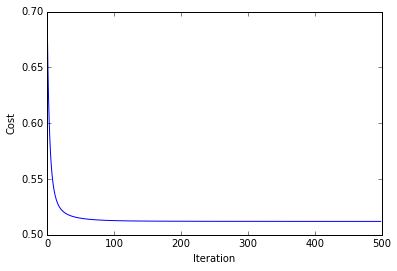

In [153]:
np.random.seed(0)
from sklearn import datasets

def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)

    final = -step1 - step2
    return np.mean(final)
def grad_desc(theta_values, X, y, lr=3e-4, converge_change=1e-7):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    print lr, converge_change
    return theta_values, np.array(cost_iter)
def pred_values(theta, X, hard=True):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

#This code is based http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero[1]

import numpy as np
import matplotlib.pyplot as plt
import math

def cent(data):
    """Rescale features of data to have properties of a standard normal distribution with zero mean and variance of 1."""
    
    np.random.seed(0) #to remove randomisation effects
    
    mean_cols = np.mean(data, axis=0)
    var_cols = np.sqrt(np.var(data, axis = 0))
    r, _ = data.shape
    mean_matrix = np.array([mean_cols]*r)
    var_matrix = np.array([var_cols]*r)
    #The following part is based on [1]
    with np.errstate(divide='ignore', invalid='ignore'):
        cent_data = np.true_divide((data - mean_matrix),var_matrix)
        cent_data[cent_data == np.inf] = 0
        cent_data = np.nan_to_num(cent_data)
    
    return cent_data


print 'wine data'
X = np.loadtxt('exam/redwinedata/redwine_train.txt')
y = np.loadtxt('exam/redwinedata/redwine_trainlabels.txt')
#print y
test = np.loadtxt('exam/redwinedata/redwine_test.txt')
testlabels = np.loadtxt('exam/redwinedata/redwine_testlabels.txt')

X = cent(X)
test = cent(test)

r, d = X.shape
#y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
#print y_flip
betas = np.zeros(d)
fitted_values, cost_iter = grad_desc(betas, X, y)
#print 'w from implementation', (fitted_values)


predicted_y = pred_values(fitted_values, X)
print 'train accuracy from implementation', np.sum(y == predicted_y)



predicted_test = pred_values(fitted_values, test)
print 'test accuracy from implementation', np.sum(testlabels == predicted_test)

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
pred = logreg.predict(test)
#print 'train accuracy from built in', sum(y == logreg.predict(X))
#print 'test accuracy from built in', sum(testlabels == logreg.predict(test))
w = logreg.coef_
#print w[0]


plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
#lr=0.0003, converge_change=.000000001 497

train_data = np.loadtxt('DD/DD_train.txt')
train_labels = np.loadtxt('DD/DD_train_labels.txt')
test_data = np.loadtxt('DD/DD_test.txt')
test_labels = np.loadtxt('DD/DD_test_labels.txt')

train_data = cent(train_data)
test_data = cent(test_data)

print 'DD data'
r, d = train_data.shape
 #flip Setosa to be 1 and Versicolor to zero to be consistent
#print y_flip
betas = np.zeros(d)
fitted_values1, cost_iter = grad_desc(betas, train_data, train_labels)
#print 'w from implementation', (fitted_values1)


predicted_y1 = pred_values(fitted_values1, train_data)
print 'train accuracy from implementation', np.sum(train_labels == predicted_y1)

predicted_test1 = pred_values(fitted_values1, test_data)
print 'test accuracy from implementation', np.sum(test_labels == predicted_test1)

compare_labels = predicted_test1 - test_labels
#print compare_labels
wrong_labels = filter(lambda a: a != 0, list(compare_labels))
#print wrong_labels
#print no_wrong_labels
print len(predicted_test1) - len(wrong_labels)

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(train_data, train_labels)
#print 'train accuracy from built in', sum(train_labels == logreg.predict(train_data))
#print 'test accuracy from built in', sum(test_labels == logreg.predict(test_data))
w = logreg.coef_
#print w[0]


In [30]:
train_data = np.loadtxt('DD/DD_train.txt')
train_labels = np.loadtxt('DD/DD_train_labels.txt')
test_data = np.loadtxt('DD/DD_test.txt')
test_labels = np.loadtxt('DD/DD_test_labels.txt')

def cent(data):
    """Rescale features of data to have properties of a standard normal distribution with zero mean and variance of 1."""
    
    np.random.seed(0) #to remove randomisation effects
    
    mean_cols = np.mean(data, axis=0)
    var_cols = np.sqrt(np.var(data, axis = 0))
    r, _ = data.shape
    mean_matrix = np.array([mean_cols]*r)
    var_matrix = np.array([var_cols]*r)
    #The following part is based on [1]
    with np.errstate(divide='ignore', invalid='ignore'):
        cent_data = np.true_divide((data - mean_matrix),var_matrix)
        cent_data[cent_data == np.inf] = 0
        cent_data = np.nan_to_num(cent_data)
    
    return cent_data

train_data = cent(train_data)
test_data = cent(test_data)

#WITH BUILT IN FUNCTION
from sklearn.linear_model import LogisticRegression

# input:  1) train data (without labels) in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#         2) trainlabels: labels for training data in the form of a N by 1 numpy vector, where N is the number of training data points
#         3) test: test data (without labels) in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions
#
# output: 1) vector (numpy array) consisting of the predicted classes for the test data
#
# note: the labels should **not** be part of the train/test data matrices!
def logreg(train_data, train_labels, test_data):
    #based on code from logistic regression lecture
    #X = Xorig + column of 1s
    def logistic(input):
        out = np.exp(input)/(1+ np.exp(input))
        return out
    def logistic_insample(X, y, w):
        N, num_feat = X.shape
        E = 0
        for n in range(N):
            E = E + (1/N)*np.log(1/logistic(y[n]*np.dot(w,X[n,:])))
        return E
    def logistic_gradient(X, y, w):
        N, _ = X.shape
        g = 0*w

        for n in range(N):
            g = g + ((-1/N)*y[n]*X[n,:])*logistic(-y[n]*np.dot(w,X[n,:]))
        return g

    def gradient_descent(Xorig, y, t_max, grad_thr):
        #include column of 1s to train_data
        N, d = Xorig.shape
        X = np.c_[np.ones(N), Xorig]
        dplus1 = d + 1 #number of weights needed

        #initialise learning rate 
        eta = 1e-3
        #initialise with random sample from normal distribution with weights at time step 0
        w = 0.1*np.random.randn(dplus1) #number of weights is equal to dimensions of training data + 1
        #compute logistic log likelihood
        E = logistic_insample(X, y, w)

        #initialise number of iterations and set boundary conditions
        t = 0
        convergence = 0

        #keep track of log likelihood values
        E_in = []

        #loop to iterate until the function converges?
        while convergence == 0:
            t = t + 1

            #compute the gradient of the log-likelihood wrt the current w
            g = logistic_gradient(X, y, w)

            #move in opposite direction of gradient to minimise the log likelihood
            v_t = -g

            #take a step in new direction
            eta_t = eta*np.linalg.norm(E_in)
            w_new = w + eta_t*v_t

            # Check for improvement
            # Compute in-sample error for new w
            E_t = logistic_insample(X, y, w_new)
            
            if E_t < E:
                w = w_new
                E = E_t
                E_in.append(E)
                eta *=1.01
            else:
                eta *= 0.99

            #not sure about this part
            g_norm = np.linalg.norm(g)
            if g_norm < grad_thr:
                convergence = 1
                
            if t > t_max:
                convergence = 1
            
            return w
        
    w = gradient_descent(train_data, train_labels, 1e7, 0.000)
    print len(w)
    #use optimised weights to predict labels for test set
    def log_pred(Xorig, w, hard = True):
        N, _ = Xorig.shape
        w_0 = w[0]
        w_new = w[1:]
        
        pred_classes = []
        for i in range(0,N):
            h_x = logistic(w[0] + np.dot((np.transpose(w_new)),Xorig[i,:]))
            
        pred_prob = logistic(w_new.dot (Xorig.T))
        pred_value = np.where(pred_prob >= .5, 1, 0)
        if hard:
            return pred_value
        return pred_prob
    pred_labels = log_pred(train_data, w)
    #using code from http://www.dummies.com/how-to/content/using-logistic-regression-in-python-for-data-scien.html
    logistic = LogisticRegression()
    logistic.fit(train_data, train_labels)
    pred_labels_builtin = logistic.predict(test_data)
       
    return pred_labels
    
    pass
pred_train = logreg(train_data, train_labels, train_data)
pred_test = logreg(train_data, train_labels, test_data)
print 'train accuracy from implementation', np.sum(train_labels == pred_train)
print 'test accuracy from implementation', np.sum(test_labels == pred_test)
#[ 0.20863823 -0.00998332 -0.02211062 -0.01353298  0.01095668 -0.00755535
 #-0.02487498 -0.03687053  0.01177903 -0.00086013 -0.0179381   0.29183236
#-0.06018673  0.29287009 -0.55967055 -0.54627027 -0.12652795  0.
 #-0.04217598]

20
20
train accuracy from implementation 267
test accuracy from implementation 0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:142: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.


In [75]:
def logistic(input):
    out = np.exp(input)/(1+ np.exp(input))
    return out

In [9]:
np.random.seed(0)
from sklearn.linear_model import SGDClassifier
train_data = np.loadtxt('DD/DD_train.txt')
train_labels = np.loadtxt('DD/DD_train_labels.txt')
test_data = np.loadtxt('DD/DD_test.txt')
test_labels = np.loadtxt('DD/DD_test_labels.txt')
print train_data.shape

logR = LogisticRegression()
logR.fit(train_data, train_labels)
w = logR.coef_
print w[0]
pred_log = logR.predict(test_data)
print w.shape


(700, 19)
[ 0.20863823 -0.00998332 -0.02211062 -0.01353298  0.01095668 -0.00755535
 -0.02487498 -0.03687053  0.01177903 -0.00086013 -0.0179381   0.29183236
 -0.06018673  0.29287009 -0.55967055 -0.54627027 -0.12652795  0.
 -0.04217598]
(1, 19)


In [65]:
#c) Run your implemented k-NN algorithm from Assignment 2 on the same dataset,
#se- lecting an optimal k by using cross validation on the training set as in Assignment 2.
#Which classifier works best on this dataset?

In [350]:
from sklearn.cross_validation import KFold
from collections import Counter

# input: train: 1) train data (without labels) in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#               2) test: test data (without labels) in the form of a M by d numpy array, where M is the number of test data points and d is the number of dimensions
#               3) trainlabels: labels for training data in the form of a N by 1 numpy vector, where N is the number of training data points
#               4) k: paramater k
# output:1) distance matrix (numpy array) between test and training samples 
#        2) vector (numpy array) consisting of the predicted classes for the test data
#
# note: the labels should **not** be part of the train/test data matrices!
def knn(train, test, trainlabels, k):
    samples = ([train], trainlabels)
    
    #from textbook
    def majority_vote(labels):
        """assumes that labels are ordered from nearest to farthest"""
        vote_counts = Counter(labels)
        winner, winner_count = vote_counts.most_common(1)[0]
        num_winners = len([count
                            for count in vote_counts.values()
                            if count == winner_count])
        if num_winners == 1:
            return winner # unique winner, so return it
        else:
            return majority_vote(labels[:-1]) # try again without the far    
    #----------------------
    
    #compute Euclidean distances of test samples from each training samples
    def distances(x, y):
        dist = 0
        for i in range(len(x)):
            squared_dist = (x[i] - y[i])**2
            dist += squared_dist
        return math.sqrt(dist)
    
    dist = []
    for a in test:
        row_dist = []
        for b in train:
            row_dist.append(distances(a,b))
        dist.append(row_dist)
    dist = np.array(dist)
    dist = dist.T
    r, c = dist.shape
    

    #sort distance in order for each test sample (each column in distance matrix)
    predicted_labels_list = []
    for i in range(0,c):
        test_i = dist[:,i]
        test_i_distance_sorted = np.argsort(test_i) #indices of distances sorted in ascending order
        #cut this off at the k-th nearest label to find the corresponding indices in trainlabels
        k_nearest_labels = trainlabels[test_i_distance_sorted[:k]]
        #use this to vote on the label of the k nearest neighbours of test sample
        predicted_labels_list.append(majority_vote(k_nearest_labels))
    predicted_labels = np.array(predicted_labels_list)
    dist = dist.T
    return predicted_labels

# input:  1) training data in the form of a N by d numpy array, where N is the number of training data points and d is the number of dimensions
#         2) training labels in the form of a N by 1 numpy vector, where N is the number of training data points
#         3) a random permutation of entries as a numpy array, e.g. np.random.permutation(len(trainlabels))
# output: 1) the optimal k
#         2) an error matrix (numpy array) of size (5,13) where column i consists of the accuracy for the 5 folds for k=i
#
# The random-permuted vector rand_perm should be used for generating 5 folds, where the first fold consists of the first N/5 elements from rand_perm, rounded up to the nearest integer; the second fold consists of the next N/5 elements, etc, and the fifth fold consists of the remaining elements
# note: to create the folds consider: KFold(len(trainlabels), n_folds=5) from sklearn.cross_validation (http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html)
# note: once you have the folds use the rand_perm vector to get the random indices in the training data and labels
def cv(train, trainlabels, rand_perm):
    
    #based on http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html
    kf = KFold(len(trainlabels), n_folds=5)
    X = train
    y = trainlabels
    
    error_lists = []
    mylist = list(kf)
    for i in range (0, 5):
        train_index, test_index = mylist[i]
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]
        test_indices = rand_perm[test_index]
        train_indices = rand_perm[train_index]
        
        #pick out rows corresponding to those indices
        train_data = train[train_indices,:] 
        test_data = train[test_indices,:]
        fold_error = []
        for j in xrange(1,26,2):
            predicted_labels = knn(train_data, test_data, trainlabels, j)
            #print predicted_labels
            test_labels = trainlabels[test_indices]
            #print test_labels
            compare_labels = predicted_labels - test_labels
            #print compare_labels
            wrong_labels = filter(lambda a: a != 0, list(compare_labels))
            #print wrong_labels
            no_wrong_labels = len(wrong_labels)
            #print no_wrong_labels
            error = no_wrong_labels/len(test_labels)
            #print error
            fold_error.append(error)
        error_lists.append(fold_error)
        error_matrix = np.array(error_lists)
    
    r, c = error_matrix.shape
    k_error_list = []
    for x in range(0,c):
        k_error = error_matrix[:,x]
        k_error_avg = np.mean(k_error)
        k_error_list.append(k_error_avg)
    k_best_index = np.argmin(k_error_list)
    #print k_error_list
    k_values = np.arange(1,26,2)
    #print k_values
    #print k_best_index
    k_best = k_values[k_best_index]
    #print k_best
    
    return k_best
    pass


In [347]:
rand_perm = np.random.permutation(len(train_labels))

k_best = cv(train_data, train_labels, rand_perm)
predicted_labels = knn(train_data, test_data, train_labels, k_best)

#print predicted_labels
#test = np.loadtxt('data_handin2/parkinsonsTest.dt')
#testlabels = test[:,22]
#print test_labels
compare_labels = predicted_labels - test_labels
#print compare_labels
wrong_labels = filter(lambda a: a != 0, list(compare_labels))
#print wrong_labels
#print no_wrong_labels
print len(wrong_labels)/len(predicted_labels)

0.240585774059


wine data
3e-07 1e-05
train accuracy from implementation 735
test accuracy from implementation 418


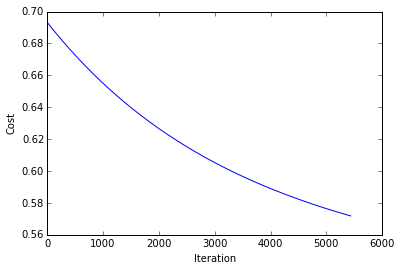

In [185]:
np.random.seed(0)
from sklearn import datasets

def logistic_func(theta, x):
    return float(1) / (1 + math.e**(-x.dot(theta)))
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc
def cost_func(theta, x, y):
    log_func_v = logistic_func(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)

    final = -step1 - step2
    return np.mean(final)
def grad_desc(theta_values, X, y, lr=3e-4, converge_change=1e-5):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    #setup cost iter
    cost_iter = [] #E_t
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost]) #E_t
    change_cost = 1 
    i = 1 #t 
    while(change_cost > converge_change):
        old_cost = cost #
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    print lr, converge_change
    return theta_values, np.array(cost_iter)
def pred_values(theta, X, hard=True):
    #normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        X = np.true_divide((X - np.mean(X, axis=0)),np.std(X, axis=0))
        X[X == np.inf] = 0
        X = np.nan_to_num(X)
    
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

#This code is based http://stackoverflow.com/questions/26248654/numpy-return-0-with-divide-by-zero[1]

import numpy as np
import matplotlib.pyplot as plt
import math

def cent(data):
    """Rescale features of data to have properties of a standard normal distribution with zero mean and variance of 1."""
    
    np.random.seed(0) #to remove randomisation effects
    
    mean_cols = np.mean(data, axis=0)
    var_cols = np.sqrt(np.var(data, axis = 0))
    r, _ = data.shape
    mean_matrix = np.array([mean_cols]*r)
    var_matrix = np.array([var_cols]*r)
    #The following part is based on [1]
    with np.errstate(divide='ignore', invalid='ignore'):
        cent_data = np.true_divide((data - mean_matrix),var_matrix)
        cent_data[cent_data == np.inf] = 0
        cent_data = np.nan_to_num(cent_data)
    
    return cent_data


print 'wine data'
X = np.loadtxt('exam/redwinedata/redwine_train.txt')
y = np.loadtxt('exam/redwinedata/redwine_trainlabels.txt')
#print y
test = np.loadtxt('exam/redwinedata/redwine_test.txt')
testlabels = np.loadtxt('exam/redwinedata/redwine_testlabels.txt')

X = cent(X)
test = cent(test)

r, d = X.shape
#y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
#print y_flip
betas = np.zeros(d)
fitted_values, cost_iter = grad_desc(betas, X, y)
#print 'w from implementation', (fitted_values)


predicted_y = pred_values(fitted_values, X)
print 'train accuracy from implementation', np.sum(y == predicted_y)



predicted_test = pred_values(fitted_values, test)
print 'test accuracy from implementation', np.sum(testlabels == predicted_test)

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
pred = logreg.predict(test)
#print 'train accuracy from built in', sum(y == logreg.predict(X))
#print 'test accuracy from built in', sum(testlabels == logreg.predict(test))
w = logreg.coef_
#print w[0]


plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
#lr=0.0003, converge_change=.000000001 497

